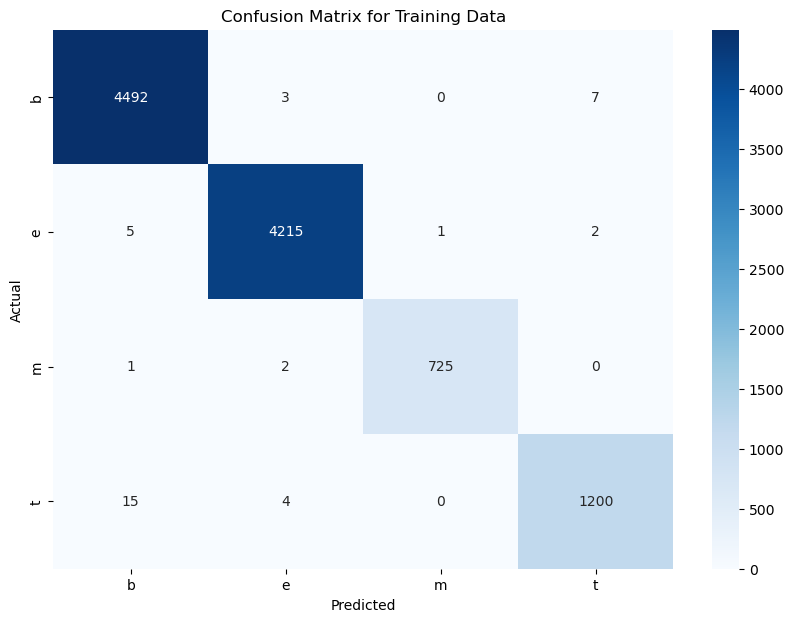

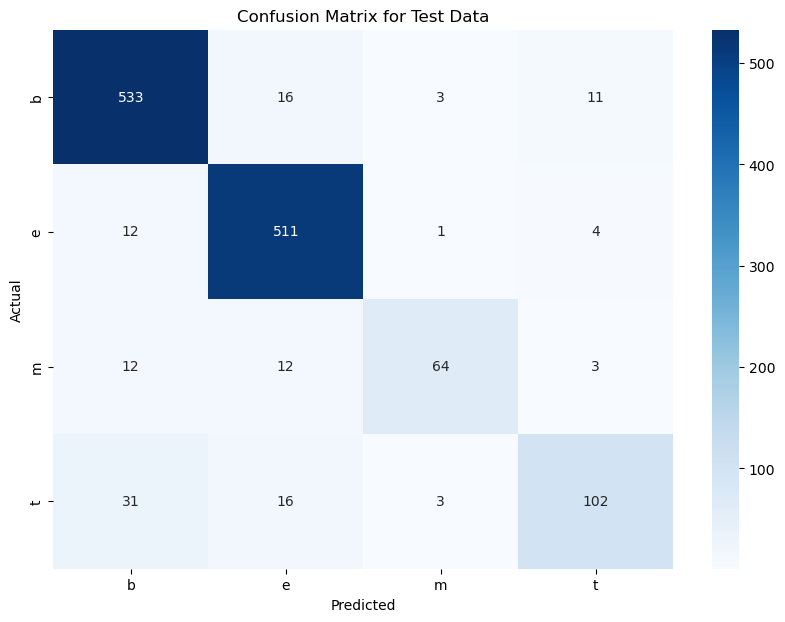

In [1]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# モデルとエンコーダーを読み込む
model = joblib.load('logistic_regression_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# データを読み込む
train_df = pd.read_csv('train.txt', sep='\t', header=None, names=['Category', 'Title'])
test_df = pd.read_csv('test.txt', sep='\t', header=None, names=['Category', 'Title'])

# 特徴とラベルを分ける
X_train = vectorizer.transform(train_df['Title'])
y_train = label_encoder.transform(train_df['Category'])

X_test = vectorizer.transform(test_df['Title'])
y_test = label_encoder.transform(test_df['Category'])

# 訓練データの予測
y_train_pred = model.predict(X_train)

# テストデータの予測
y_test_pred = model.predict(X_test)

# 混同行列の作成
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# 混同行列の可視化
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# ラベルを取得
labels = label_encoder.classes_

# 混同行列の表示
plot_confusion_matrix(train_cm, labels, 'Confusion Matrix for Training Data')
plot_confusion_matrix(test_cm, labels, 'Confusion Matrix for Test Data')
